<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libaries" data-toc-modified-id="Libaries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libaries</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Training-and-Test-Data" data-toc-modified-id="Training-and-Test-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Training and Test Data</a></span></li><li><span><a href="#Radom-Forest" data-toc-modified-id="Radom-Forest-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Radom Forest</a></span><ul class="toc-item"><li><span><a href="#Model-fitting-1" data-toc-modified-id="Model-fitting-1-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Model fitting 1</a></span></li><li><span><a href="#Model-1-Performance" data-toc-modified-id="Model-1-Performance-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Model 1 Performance</a></span></li><li><span><a href="#Model-fitting-2" data-toc-modified-id="Model-fitting-2-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Model fitting 2</a></span></li><li><span><a href="#Model-2-Performance" data-toc-modified-id="Model-2-Performance-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Model 2 Performance</a></span></li><li><span><a href="#Feature-importance" data-toc-modified-id="Feature-importance-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Feature importance</a></span></li><li><span><a href="#Feature-names" data-toc-modified-id="Feature-names-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Feature names</a></span><ul class="toc-item"><li><span><a href="#Buid-a-function" data-toc-modified-id="Buid-a-function-4.6.1"><span class="toc-item-num">4.6.1&nbsp;&nbsp;</span>Buid a function</a></span></li></ul></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Libaries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import sklearn

# Load Data

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

# Training and Test Data

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
iris_dataset['data'], iris_dataset['target'], random_state=0)

# Radom Forest

## Model fitting 1

In [24]:
forest = RandomForestClassifier(criterion='gini',
                                n_estimators=5,
                                random_state=1,
                                n_jobs=2)

In [25]:
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, n_jobs=2, random_state=1)

## Model 1 Performance

In [27]:
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.974


## Model fitting 2

In [34]:
forest2 = RandomForestClassifier(criterion='gini',
                                n_estimators=100,
                                random_state=1,
                                n_jobs=2)

In [35]:
forest2.fit(X_train, y_train)

RandomForestClassifier(n_jobs=2, random_state=1)

## Model 2 Performance

In [36]:
print("Accuracy on training set: {:.3f}".format(forest2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest2.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.974


## Feature importance

## Feature names

In [41]:
print("Feature names: \n{}".format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### Buid a function

In [39]:
#To plot coefficients
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8, 8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

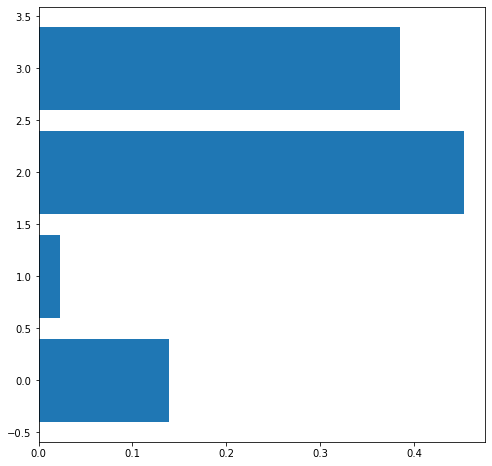

In [40]:
plot_feature_importances(forest2)

# Conclusion
By increasing the number of trees (from 5 to 100 trees) in our model, we got 97% accuracy better than the linear models or a single decision tree, without tuning any parameters. We could adjust the max_features setting, or apply pre-pruning as we did for the single decision tree. However, often the default parameters of the random forest already work quite well. 

Similarly to the decision tree, the random forest provides feature importances, which are computed by aggregating the feature importances over the trees in the forest. Typically, the feature importances provided by the random forest are more reliable than the ones provided by a single tree.



